In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import types

Initalizing the databse

In [7]:
csv_file = "Data/us_states_covid19_daily.csv"
db_file = 'covid19_states_2020.db'

# Connect to a database and read the file to a dataframe
conn = sqlite3.connect(db_file)
df = pd.read_csv(csv_file)

#Create a smaller df of necessary columns
df = df[["date","state","positive","negative","death"]]

# Convert the float time to hours
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['month'] = df['date'].dt.month

# Convert the dataframe to an sql table
table_name = 'covid19_states_2020_SQL'
df.to_sql(table_name, conn, if_exists='replace', index=False)
print(df.dtypes)

conn.close()

date        datetime64[ns]
state               object
positive           float64
negative           float64
death              float64
month                int32
dtype: object


Positives Cases in 2020 (Grouped by Month)

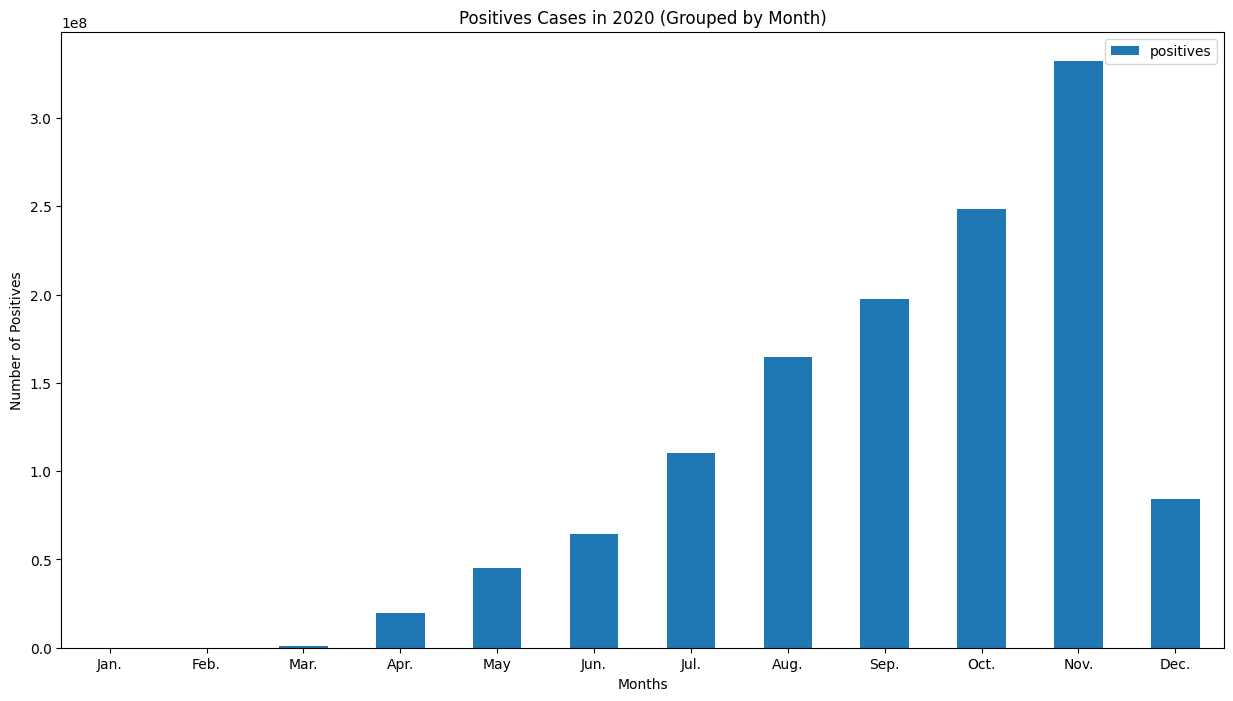

In [ ]:
# Group by month and count the number of positives
positives_per_month = df.groupby('month')['positive'].sum().reset_index(name='positives')

# Finally, plot the data
ax = positives_per_month.plot(kind='bar', x='month', y='positives', figsize=(15, 8))
plt.title('Positives Cases in 2020 (Grouped by Month)')
plt.xlabel('Months')
plt.ylabel('Number of Positives')

ax.set_xticklabels(
    ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.",
      "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
, rotation=0, ha='center')

plt.show()

Positive Cases in 2020 (Grouped by State)

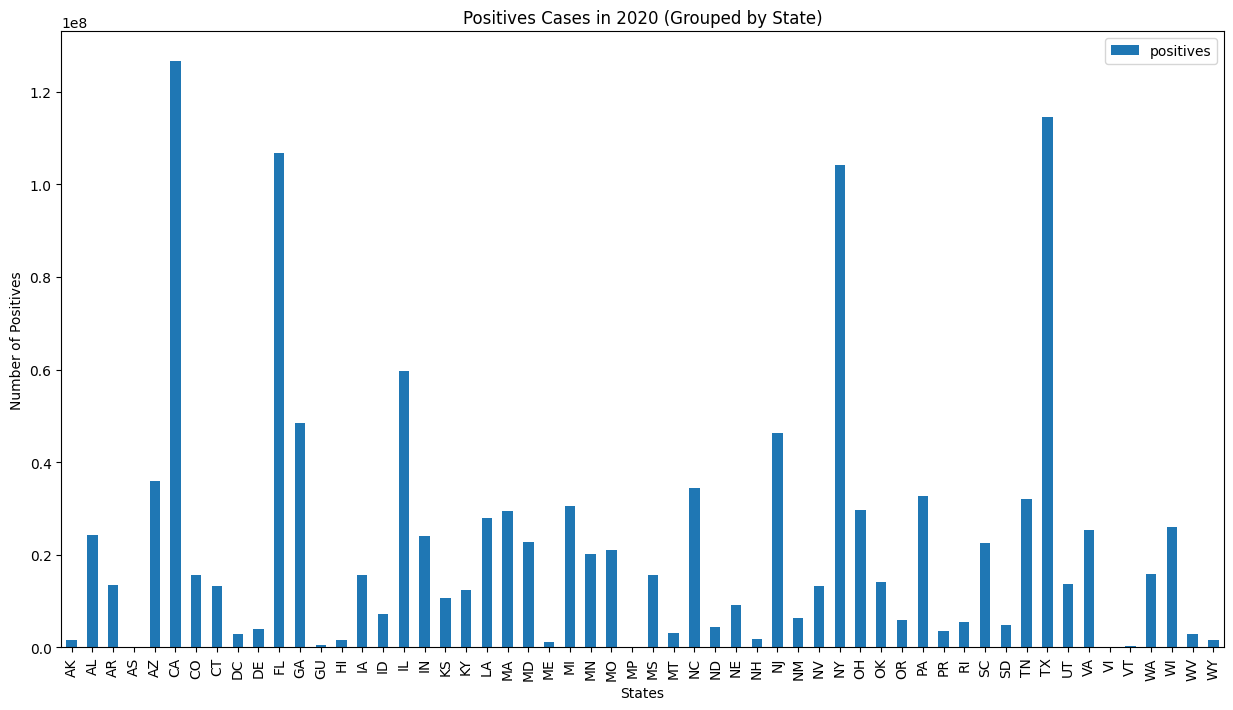

In [ ]:
# Group by state and count the number of positives
positives_per_state = df.groupby('state')['positive'].sum().reset_index(name='positives')

# Finally, plot the data
positives_per_state.plot(kind='bar', x='state', y='positives', figsize=(15, 8))
plt.title('Positives Cases in 2020 (Grouped by State)')
plt.xlabel('States')
plt.ylabel('Number of Positives')

plt.show()


Positive Cases in NJ (2020, Grouped by Month)

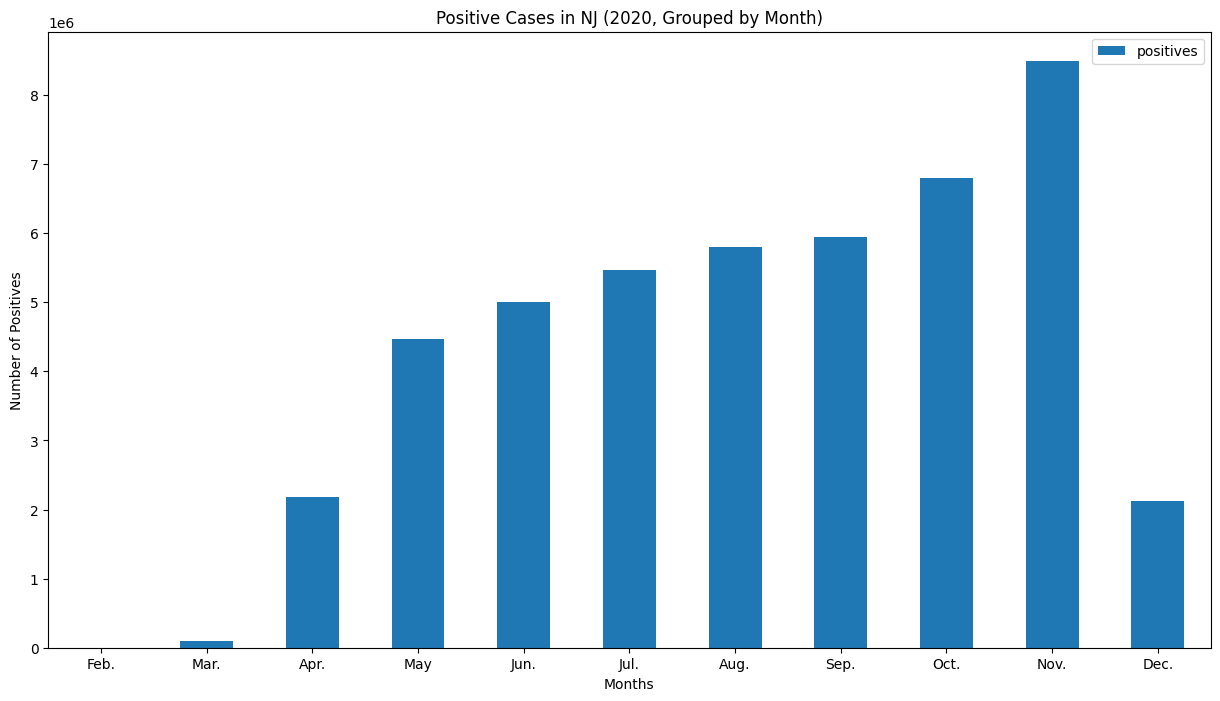

In [10]:
# Find only NJ cases
df_nj = df[df['state'] == 'NJ']

# Group by month and count the number of positives
positives_per_month_nj = df_nj.groupby('month')['positive'].sum().reset_index(name='positives')

# Finally, plot the data
ax = positives_per_month_nj.plot(kind='bar', x='month', y='positives', figsize=(15, 8))
plt.title('Positive Cases in NJ (2020, Grouped by Month)')
plt.xlabel('Months')
plt.ylabel('Number of Positives')

ax.set_xticklabels(
    ["Feb.", "Mar.", "Apr.", "May", "Jun.",
      "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
, rotation=0, ha='center')

plt.show()

Negative Cases in 2020 (Grouped by Month)

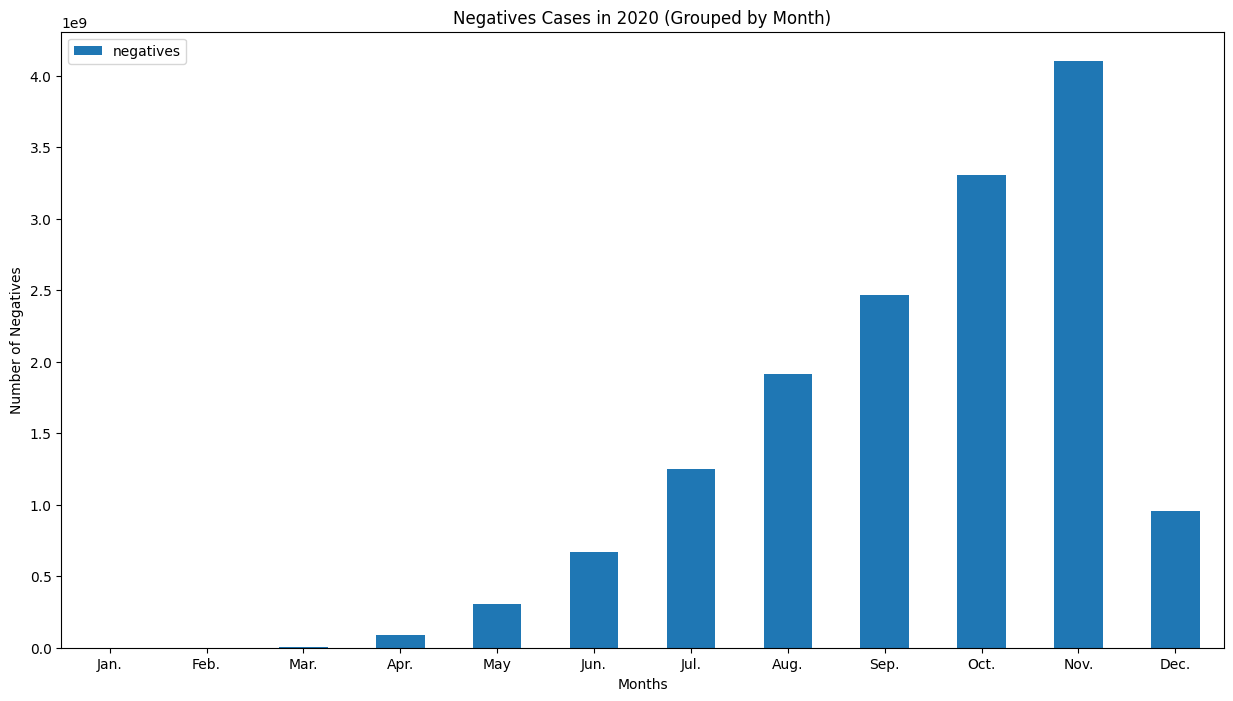

In [11]:
# Group by month and count the number of positives
negatives_per_month = df.groupby('month')['negative'].sum().reset_index(name='negatives')

# Finally, plot the data
ax = negatives_per_month.plot(kind='bar', x='month', y='negatives', figsize=(15, 8))
plt.title('Negatives Cases in 2020 (Grouped by Month)')
plt.xlabel('Months')
plt.ylabel('Number of Negatives')

ax.set_xticklabels(
    ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.",
      "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
, rotation=0, ha='center')

plt.show()

Negative Cases in 2020 (Grouped by State)

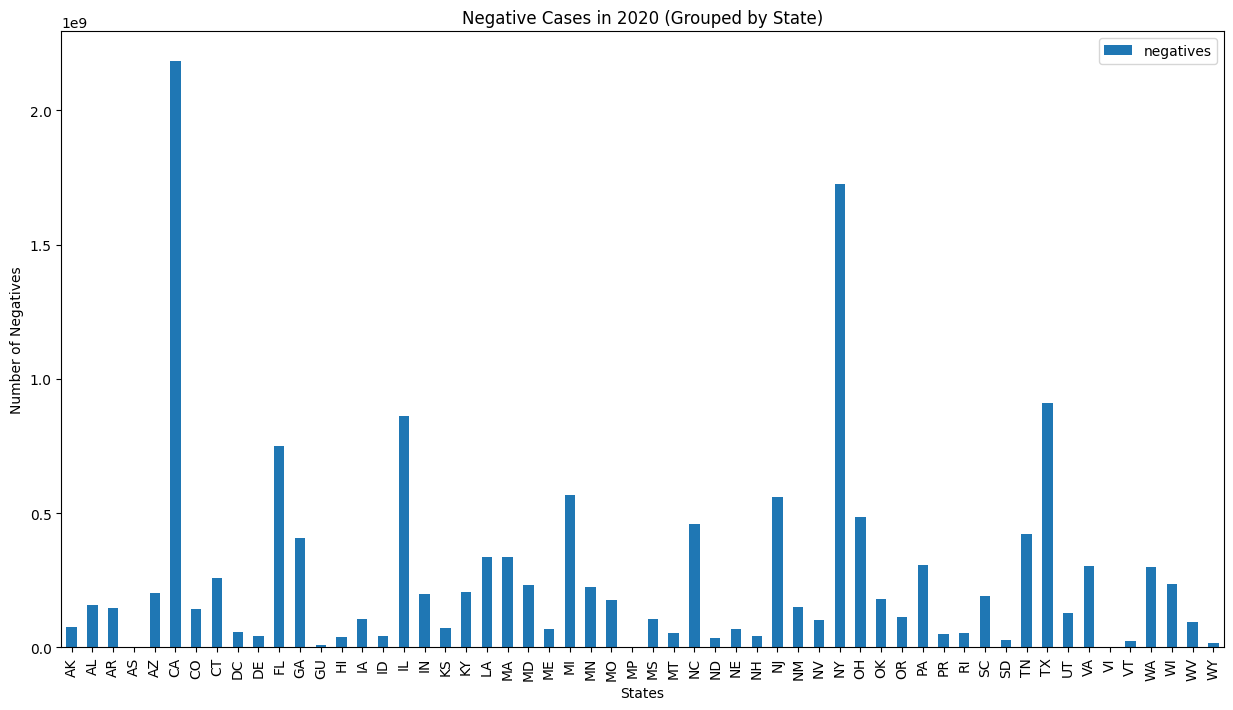

In [22]:
# Group by state and count the number of positives
negatives_per_state = df.groupby('state')['negative'].sum().reset_index(name='negatives')

# Finally, plot the data
negatives_per_state.plot(kind='bar', x='state', y='negatives', figsize=(15, 8))
plt.title('Negative Cases in 2020 (Grouped by State)')
plt.xlabel('States')
plt.ylabel('Number of Negatives')
plt.show()